In [7]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as pl
import numpy as np
import re
from scipy.special import logsumexp
import glob
import matplotlib
mplparams = {
    'text.usetex': True,
    'axes.linewidth': 1,
    'lines.linewidth' : 1.5,
    'axes.grid': False,
    'axes.labelweight': 'normal',
    'font.family': 'DejaVu Sans',
    'font.size': 26,
    'figure.figsize': (10,8),
    'legend.fontsize': 26,
    'legend.handlelength' : 2,
    'axes.grid' : True
}
matplotlib.rcParams.update(mplparams)
delta_mass = 0.1
delta_chi = 0.005

In [9]:
red = '#D60606'
blue = '#0083DE'
green = '#00BA75'
yellow = '#FFC61E'
purple = '#A433B3'
orange = '#FD882E'

In [5]:
def metadata(filename):
    # Metadata
    f = open(filename)
    header = f.readline()[2:]

    chi_patt = r"chi_bounds=\((\d+\.\d+)_(\d+\.\d+)\)"
    chi_match = re.search(chi_patt, header)
    chi_lower = float(chi_match.group(1))
    chi_upper = 0.99

    mass_patt = r"mass_bounds=\((\d+)_(\d+)\)"
    mass_match = re.search(mass_patt, header)
    mass_lower = float(mass_match.group(1))
    mass_upper = float(mass_match.group(2))

    massspace = np.arange(mass_lower, mass_upper, delta_mass)
    chispace = np.arange(chi_lower, chi_upper, delta_chi)
    mass_grid, chi_grid = np.meshgrid(massspace, chispace)
    # projected_mass, projected_chi = qnm_filter.project_to_1d(likelihood_data, np.diff(massspace)[0], np.diff(chispace)[0])
    
    return chi_lower, chi_upper, mass_lower, mass_upper, \
            massspace, chispace, mass_grid, chi_grid

## False neg

In [5]:
mass_thresh = 85
chi_thresh = 0.35

In [6]:
filename = 'results/manualWaveform_SNR=4_33.dat'
[chi_lower, chi_upper, mass_lower, mass_upper, \
massspace, chispace, mass_grid, chi_grid] = metadata(filename)
likelihood_inj, likelihood_filt = np.loadtxt(filename)
likelihood_inj = np.reshape(likelihood_inj,(len(chispace), len(massspace)))
likelihood_filt = np.reshape(likelihood_filt,(len(chispace), len(massspace)))

In [7]:
idx_arr = np.logical_and(mass_grid < mass_thresh, chi_grid>chi_thresh)
mask = np.logical_not(idx_arr)
temp = np.ma.masked_array(likelihood_filt, mask=mask)  

In [8]:
import qnm_filter
credible_region = qnm_filter.find_credible_region(likelihood_filt)

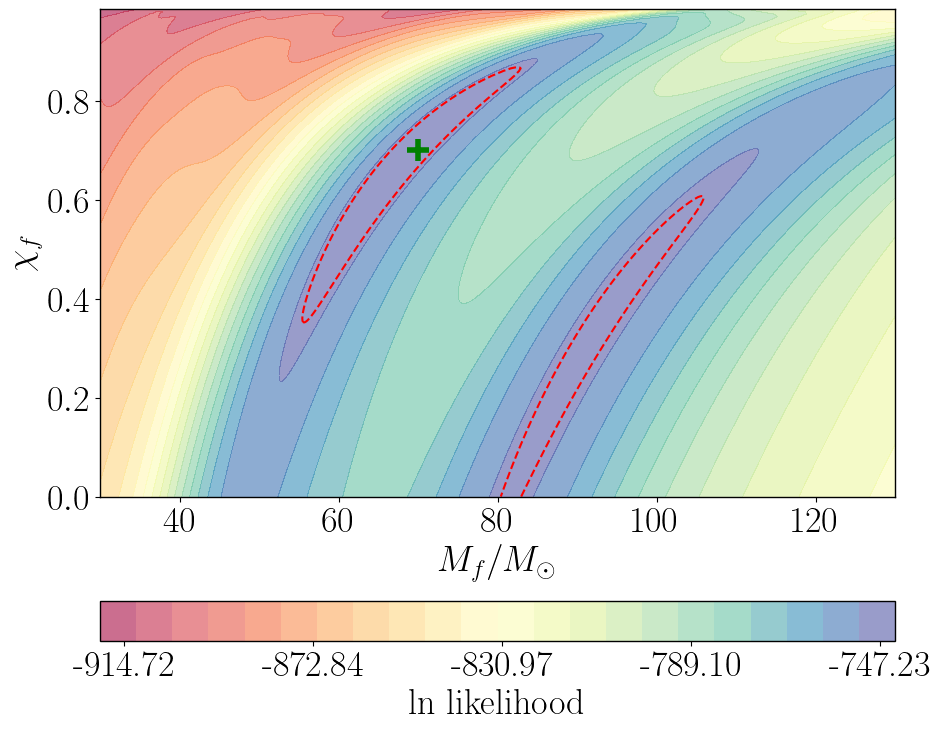

In [9]:
pl.rc('figure')
fig, ax = pl.subplots()
contours = ax.contourf(mass_grid, chi_grid, likelihood_filt, 20, cmap='Spectral',
                       origin='lower', alpha=0.6, linestyles='--')
dotted = ax.contour(mass_grid, chi_grid, likelihood_filt, [credible_region], colors = 'red', \
                   linestyles ='--')
ax.scatter(x=70, y=0.7, s=255, marker='+', 
           c='g', linewidths=4, label='Injected')
ax.plot(np.nan, np.nan, c='r', ls='--', label='90\% credible region')

# coloarbar
cbar=fig.colorbar(contours, orientation="horizontal", 
                  pad=0.15, format='%3.2f')
cbar.set_label(r'$\ln$ likelihood')
cbar.set_ticks(np.linspace(np.min(likelihood_filt), np.max(likelihood_filt), 5))

# pl.legend(loc = 'lower right', prop={'size': 20})
pl.xlabel(r'$M_f/M_\odot$')
pl.ylabel(r'$\chi_f$')
pl.tight_layout()
pl.savefig("plots/220+330_full.pdf")

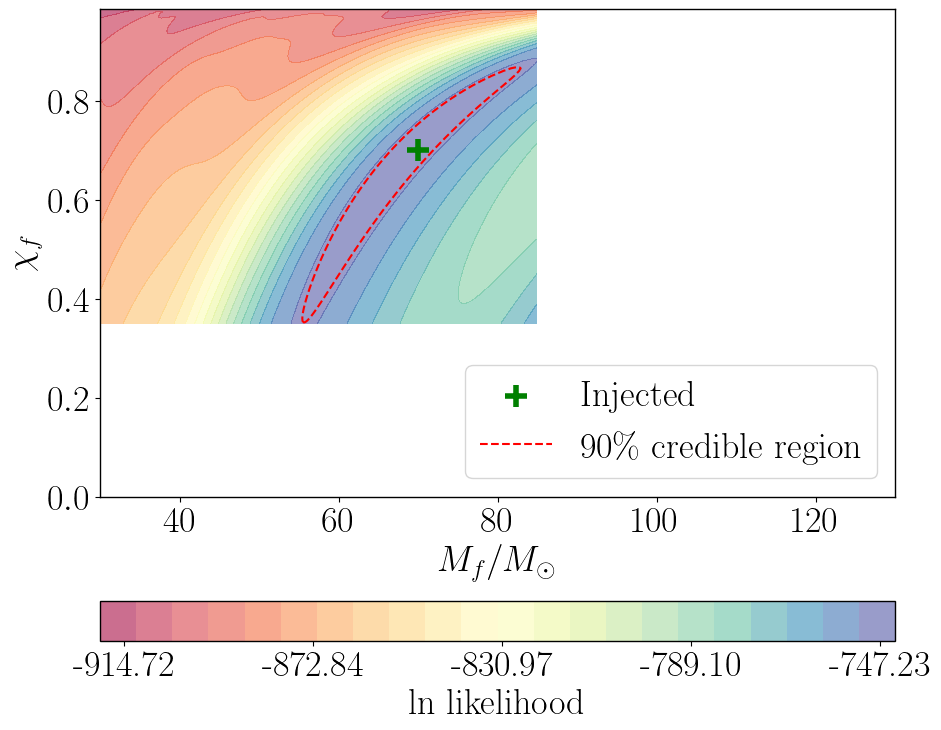

In [10]:
pl.rc('figure')
fig, ax = pl.subplots()
contours = ax.contourf(mass_grid, chi_grid, temp, 20, cmap='Spectral',
                       origin='lower', alpha=0.6, linestyles='--')
dotted = ax.contour(mass_grid, chi_grid, temp, [credible_region], colors = 'red', \
                   linestyles ='--')
ax.scatter(x=70, y=0.7, s=255, marker='+', 
           c='g', linewidths=4, label='Injected')
ax.plot(np.nan, np.nan, c='r', ls='--', label='90\% credible region')

# coloarbar
cbar=fig.colorbar(contours, orientation="horizontal", 
                  pad=0.15, format='%3.2f')
cbar.set_label(r'$\ln$ likelihood')
cbar.set_ticks(np.linspace(np.min(likelihood_filt), np.max(likelihood_filt), 5))

pl.legend(loc = 'lower right', prop={'size': 26})
pl.xlabel(r'$M_f/M_\odot$')
pl.ylabel(r'$\chi_f$')
pl.tight_layout()
pl.savefig("plots/220+330_restricted.pdf")

## False positive

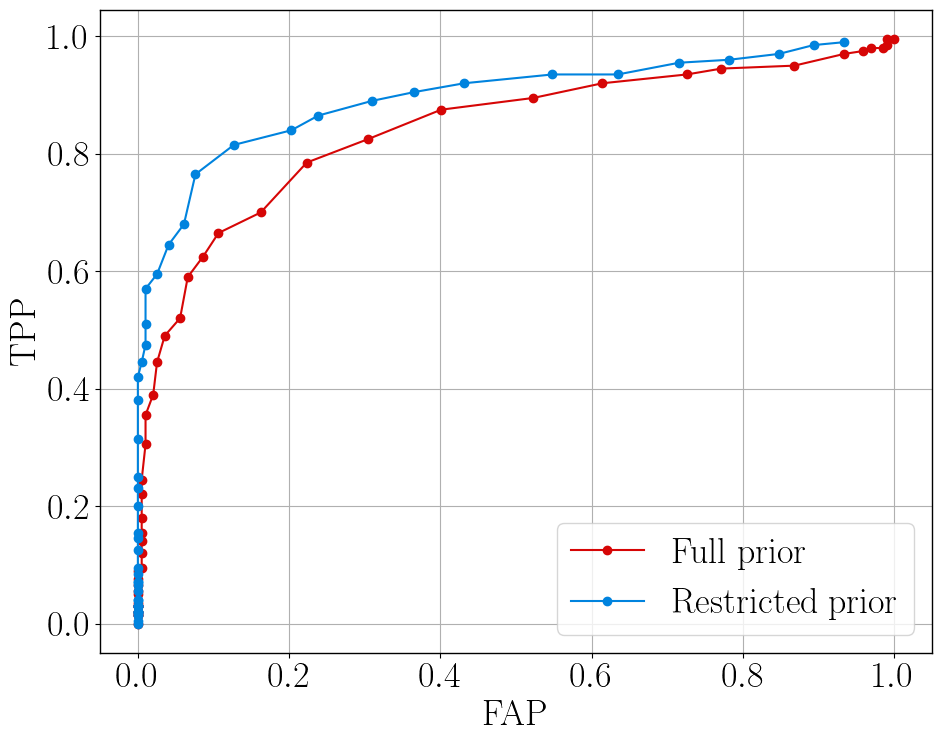

In [12]:
[false_alarm, true_pos] = np.loadtxt("results/fullPrior_ROC.txt")
pl.plot(false_alarm, true_pos, '-o', c=red, label='Full prior')

[false_alarm, true_pos] = np.loadtxt("results/restrictedPrior_ROC.txt")
pl.plot(false_alarm, true_pos, '-o', c=blue, label='Restricted prior')
pl.xlabel("FAP")
pl.ylabel("TPP")
pl.legend()
pl.tight_layout()
pl.savefig("plots/220+330_ROC.pdf")

0.0003373961299134268

In [78]:
0.5*1e-3/qnm_filter.Filter.mass_unit(68.5)

1.4819375673582742